# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Reading DataSet

In [2]:
ds=pd.read_csv('IRIS.csv')

In [3]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis(EDA)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
#Data Structure 
print(type(ds))
print(ds.shape)

<class 'pandas.core.frame.DataFrame'>
(150, 5)


In [7]:
#data types
ds.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## checking for duplicated rows

In [8]:
#Print the duplicated rows
ds[ds.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Removeing duplicated rows

In [9]:
ds1=ds.drop_duplicates()

In [10]:
ds1[ds1.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


In [11]:
#Count of duplicated rows
ds1[ds1.duplicated()].shape[0]

0

In [12]:
ds1.shape

(147, 5)

# Outlier Detection

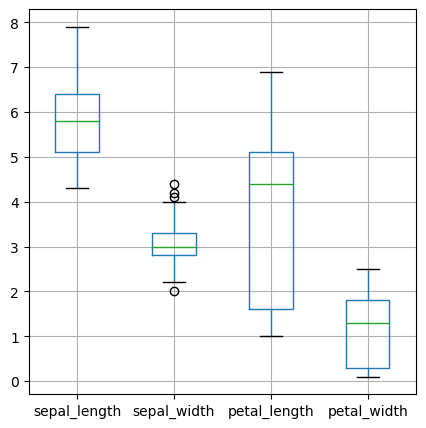

In [13]:
box=ds1.boxplot(figsize=(5,5)) 

In [14]:
plt.boxplot(ds1['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18973ff66d0>,
 'caps': [<matplotlib.lines.Line2D at 0x189747e0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x189747d1f10>],
 'medians': [<matplotlib.lines.Line2D at 0x189747e1910>],
 'fliers': [<matplotlib.lines.Line2D at 0x189747d3d50>],
 'means': []}

In [15]:
box

<Axes: >

In [16]:
Q1 = ds1['sepal_width'].quantile(0.25)
Q3 = ds1['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

C:\Users\91901\AppData\Local\Temp\ipykernel_24032\2602489655.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds2 = ds1[(ds1['sepal_width'] >= lower_bound) & (ds['sepal_width'] <= upper_bound)]


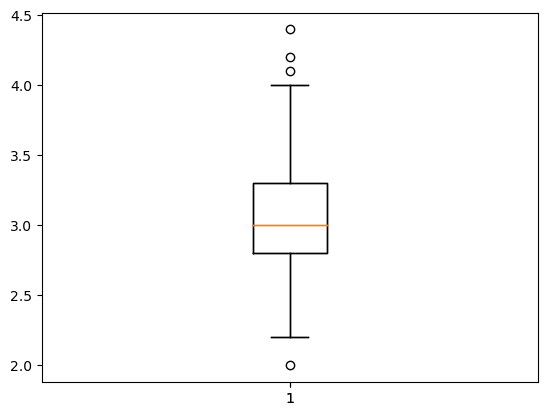

In [18]:
ds2 = ds1[(ds1['sepal_width'] >= lower_bound) & (ds['sepal_width'] <= upper_bound)]
plt.boxplot(ds2['sepal_width'])
plt.show()

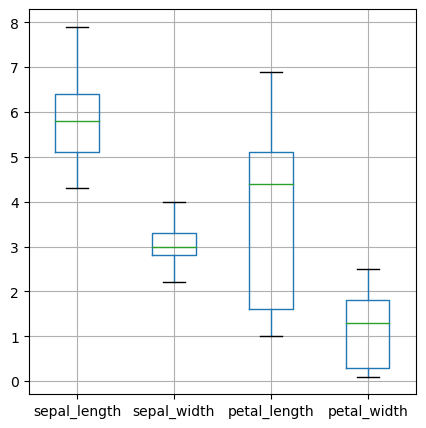

In [19]:
ds2.boxplot(figsize=(5,5)) 
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
ds.iloc[:, -1] = labelencoder.fit_transform(ds.iloc[:,-1])

C:\Users\91901\AppData\Local\Temp\ipykernel_24032\1142028479.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ds.iloc[:, -1] = labelencoder.fit_transform(ds.iloc[:,-1])


In [22]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
ds2.shape

(143, 5)

In [24]:
ds2.reset_index(drop=True, inplace=True) 

In [25]:
ds2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.7,3.0,5.2,2.3,Iris-virginica
139,6.3,2.5,5.0,1.9,Iris-virginica
140,6.5,3.0,5.2,2.0,Iris-virginica
141,6.2,3.4,5.4,2.3,Iris-virginica
142,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
X=ds2.iloc[:,0:4]
Y=ds2['species']

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteri

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

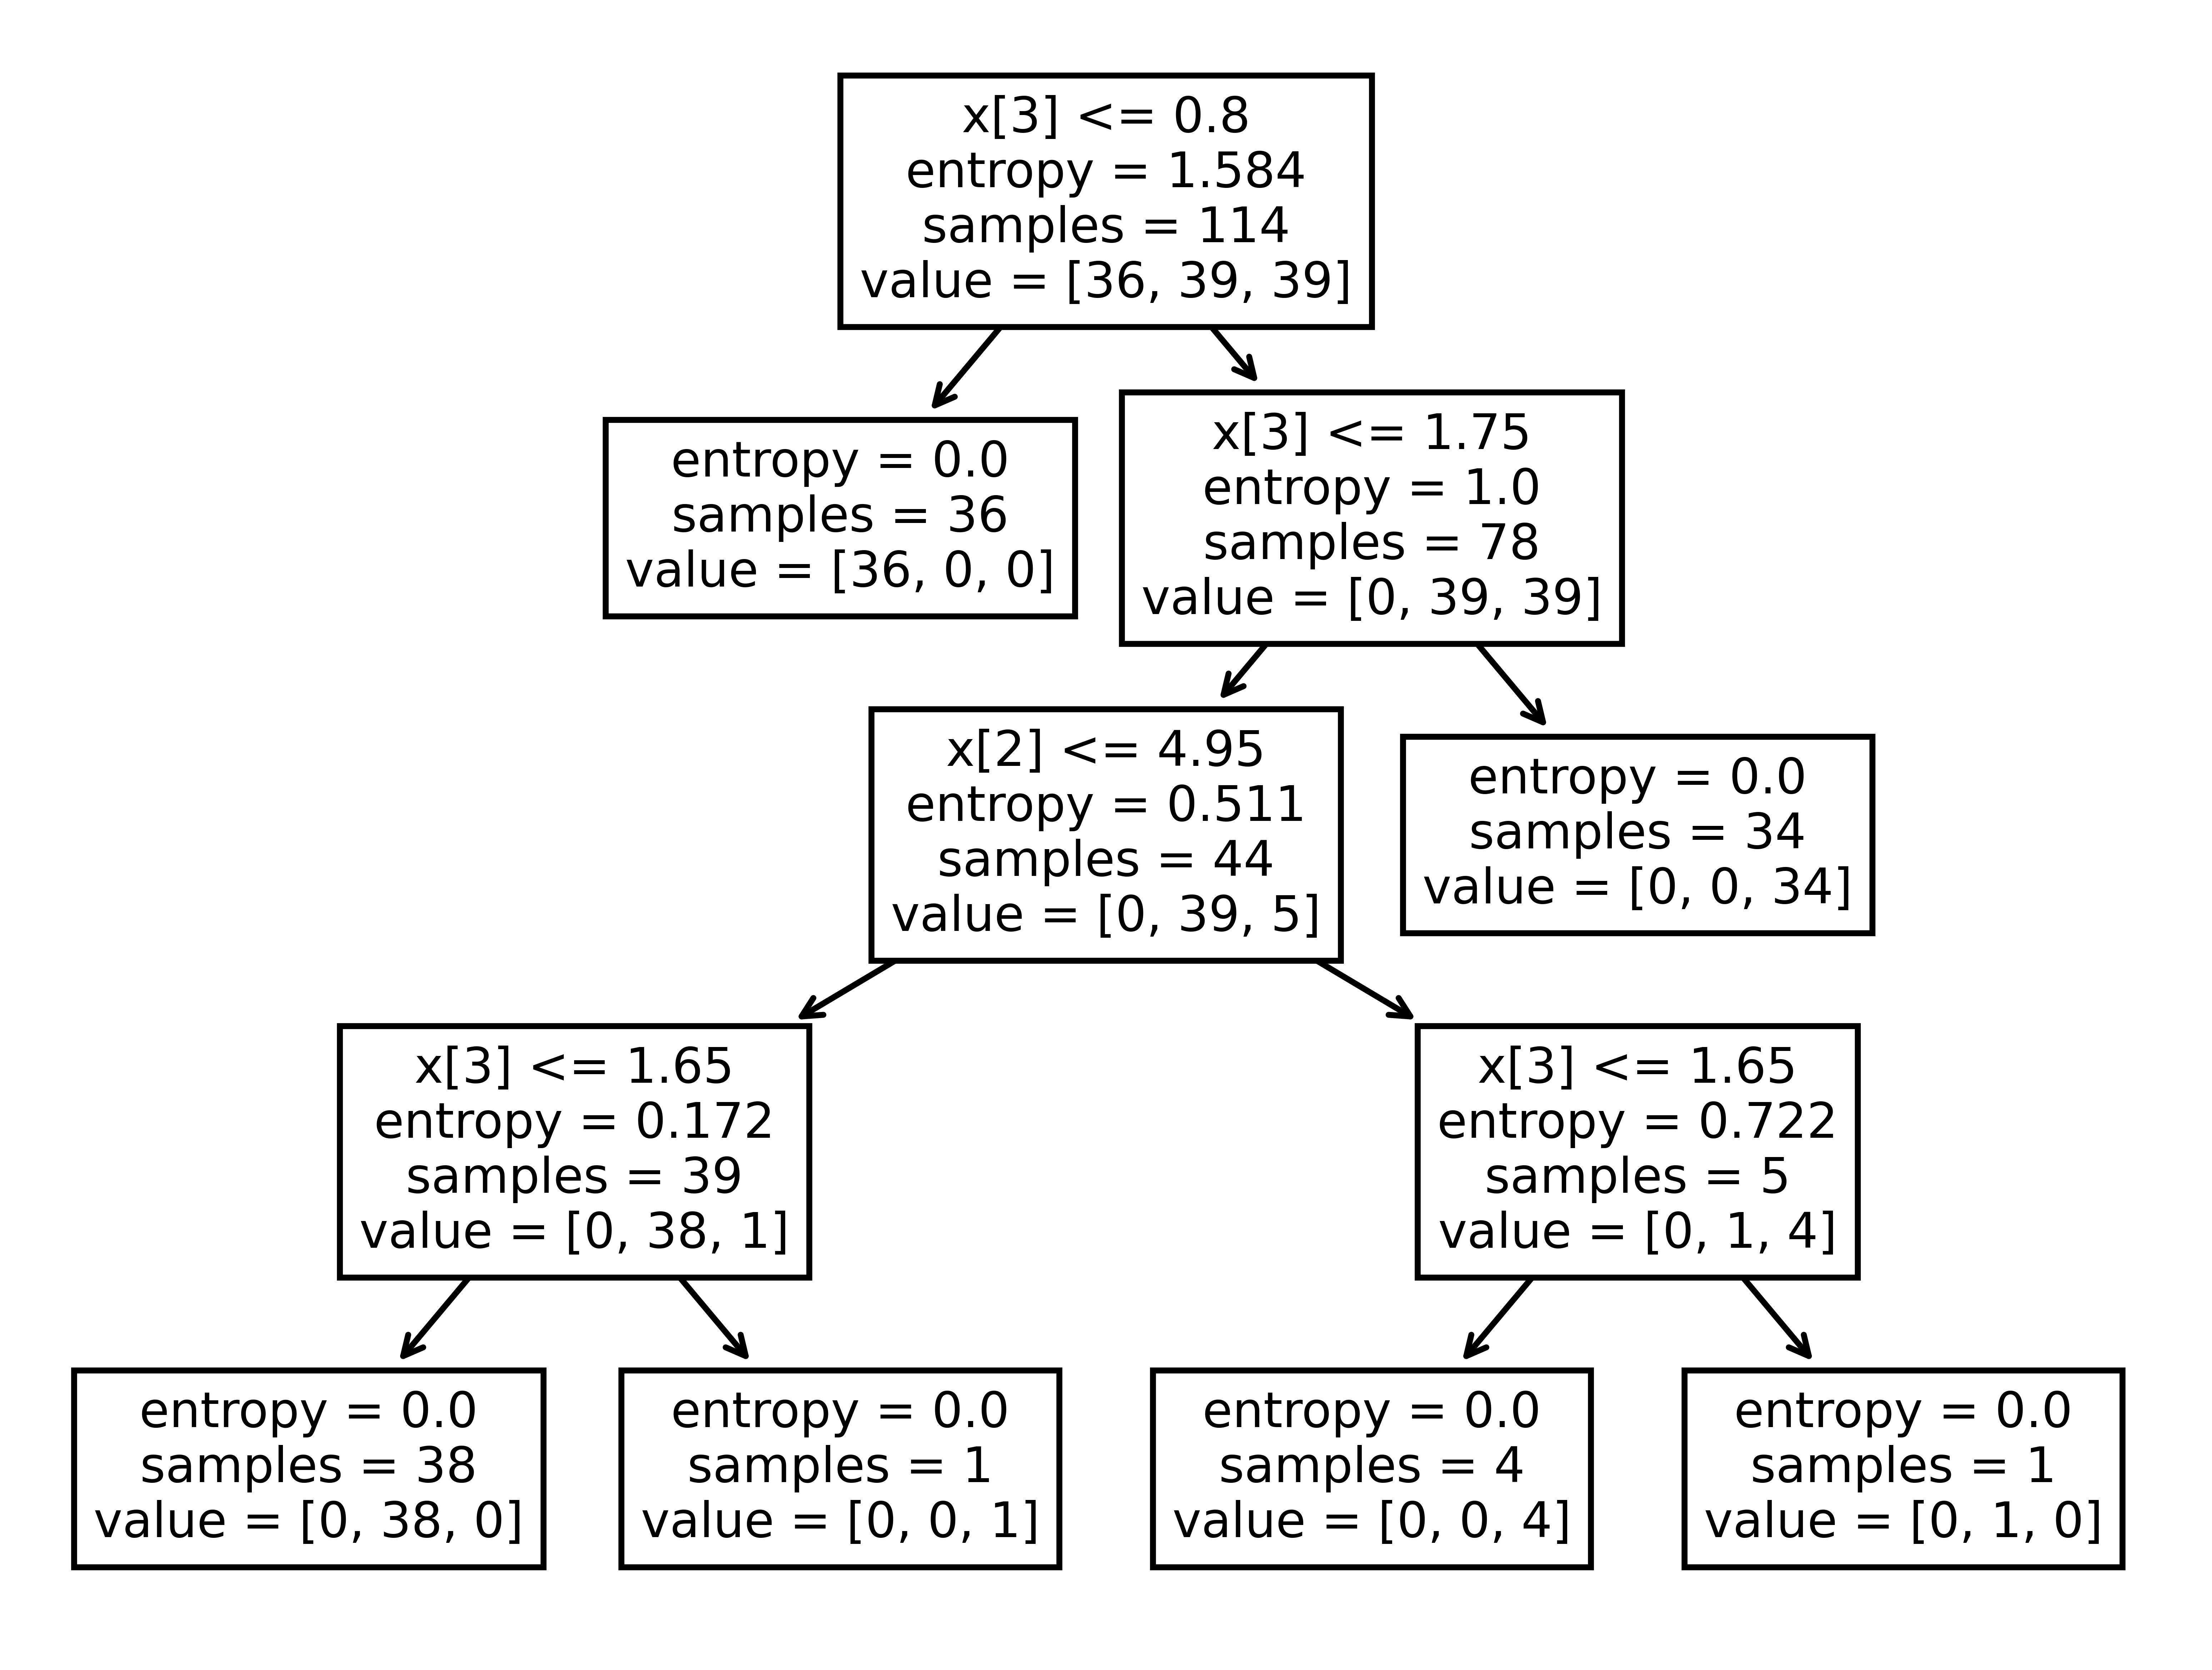

In [29]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);
plt.show()

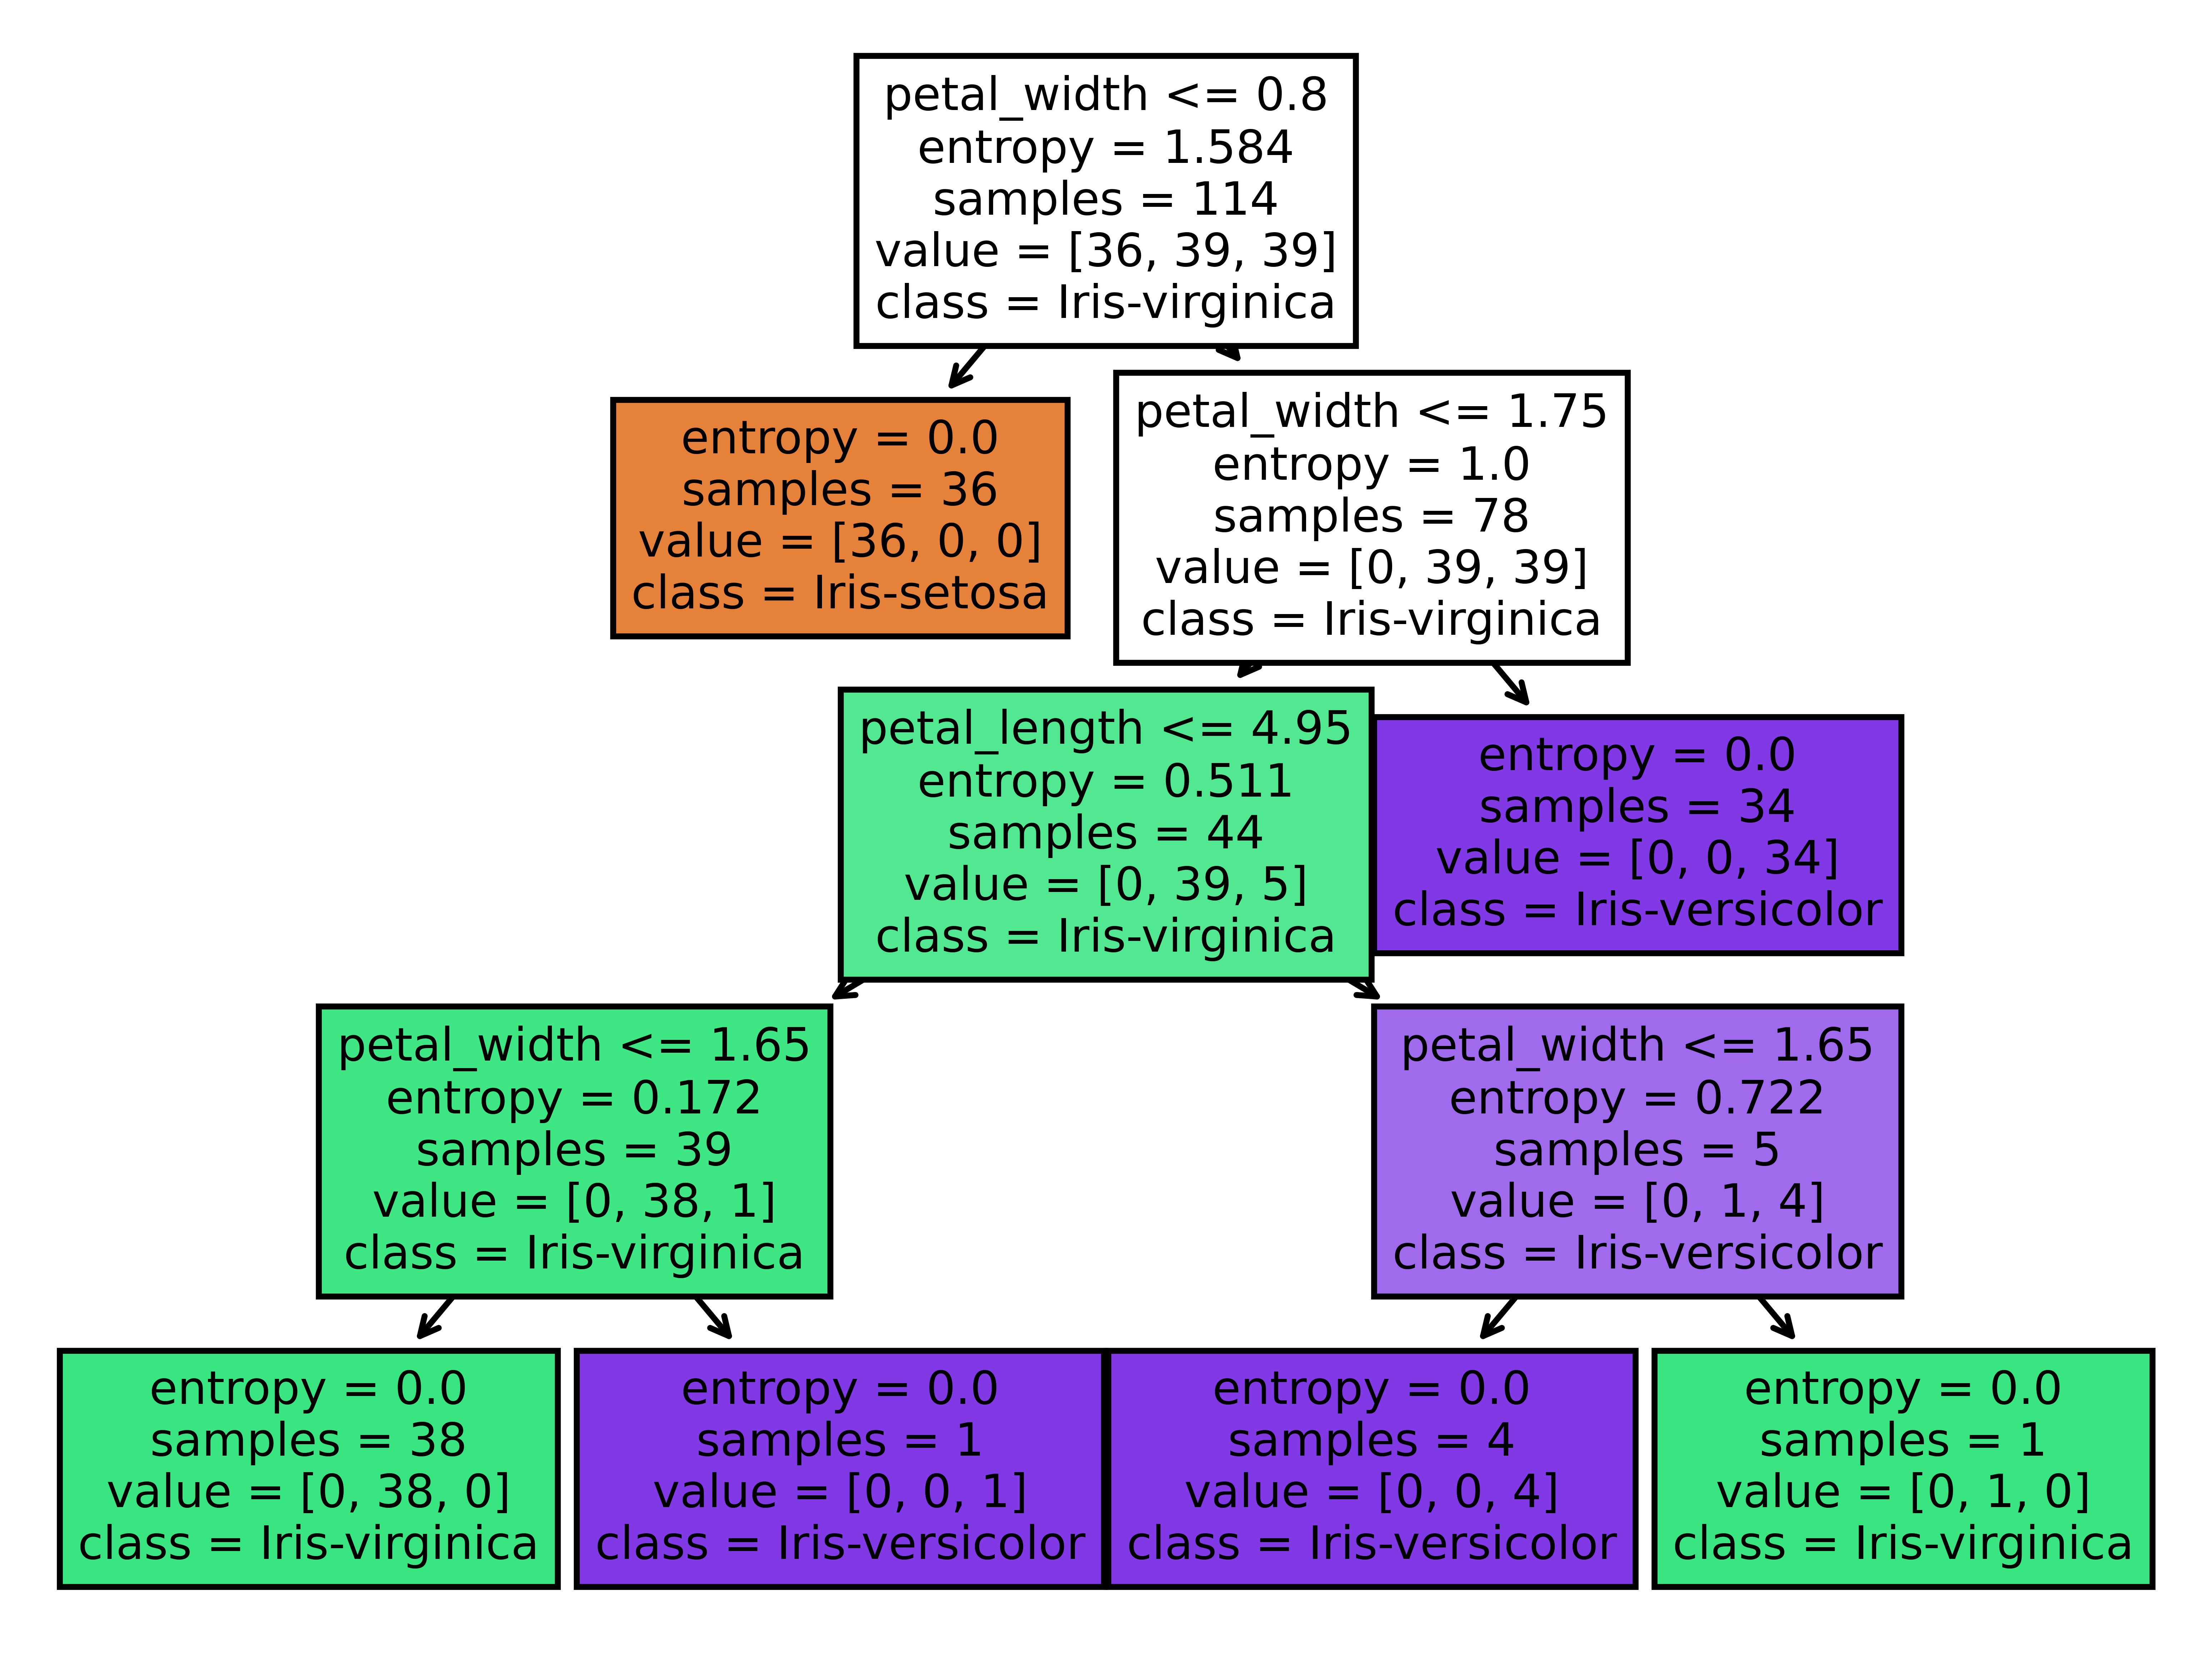

In [30]:
fn=['sepal_length','sepal_width','petal_length','petal_width']
cn=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plt.figure(dpi=1200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [31]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 
preds

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [32]:
print(classification_report(y_test,preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        29
      macro avg       0.94      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.9310344827586207

# SVM Classification

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#### Grid Search CV

In [36]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.01],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}])

In [37]:
gsv.best_params_ , gsv.best_score_

({'kernel': 'linear', 'gamma': 0.5, 'C': 10}, 0.9824561403508772)

In [38]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 93.10344827586206


array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [39]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [40]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        29
      macro avg       0.94      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



# KNN Classification

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [43]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [44]:
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid

{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39])}

In [45]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.9721674876847292
{'n_neighbors': 6}


In [47]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=12)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.971905
1     0.971905
28    0.971905
27    0.971905
26    0.971905
25    0.971905
24    0.971905
23    0.971905
22    0.971905
21    0.971905
20    0.971905
19    0.971905
18    0.971905
17    0.971905
16    0.971905
15    0.971905
14    0.971905
13    0.971905
12    0.971905
11    0.971905
10    0.971905
9     0.971905
8     0.971905
7     0.971905
6     0.971905
5     0.971905
4     0.971905
3     0.971905
2     0.971905
29    0.971905
dtype: float64

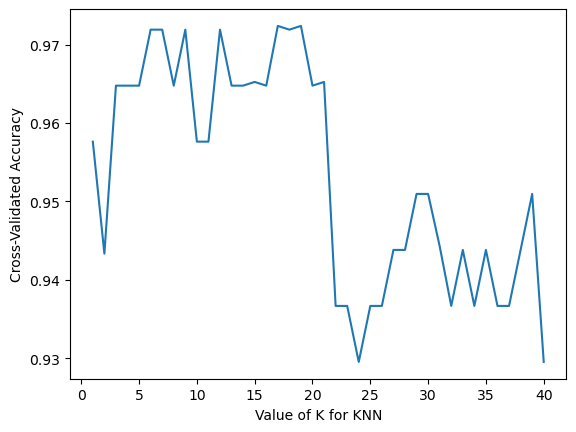

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LogisticRegression()

In [51]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iri

In [52]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})

In [53]:
y_pred_df

,actual,predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
138,Iris-virginica,Iris-virginica
139,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
141,Iris-virginica,Iris-virginica


In [54]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[45  0  0]
 [ 0 46  3]
 [ 0  1 48]]


In [55]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch? 
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        45
Iris-versicolor       0.98      0.94      0.96        49
 Iris-virginica       0.94      0.98      0.96        49

       accuracy                           0.97       143
      macro avg       0.97      0.97      0.97       143
   weighted avg       0.97      0.97      0.97       143



In [56]:
classifier.predict_proba(X)[0][1]

0.019866210861872926

In [57]:
classifier.coef_

array([[-0.44032123,  0.91481018, -2.49447617, -1.07332458],
       [ 0.52717529, -0.2908968 , -0.20706914, -0.93311115],
       [-0.08685406, -0.62391338,  2.70154531,  2.00643573]])

In [58]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(X,y_pred)
y_pred = LR.predict(X)
LRAcc = accuracy_score(Y,y_pred)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 95.10%
